In [20]:
# import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [21]:
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [22]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def plot_history(history):
    # Get the training and validation accuracy and loss from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot training and validation accuracy
    plt.figure(figsize=(14, 6))

    # Subplot 1: Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r*-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Subplot 2: Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r*-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_multiple_histories(histories, labels, save_name=None):
    """
    Plots the training and validation accuracy and loss for multiple models.

    Parameters:
        histories (list): List of Keras history objects from training.
        labels (list): List of labels corresponding to each model (for legend).
    """
    plt.figure(figsize=(14, 6))
    colors = plt.cm.tab10(range(len(histories)))

    # Subplot 1: Accuracy
    plt.subplot(1, 2, 1)
    for i, history in enumerate(histories):
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        epochs = range(1, len(acc) + 1)
        plt.plot(epochs, acc, label=f'{labels[i]} - Training', color=colors[i])
        plt.plot(epochs, val_acc, '--', label=f'{labels[i]} - Validation', color=colors[i])
    plt.title('Training and Validation Accuracy')
    # plt.ylim(0,1)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')

    # Subplot 2: Loss
    plt.subplot(1, 2, 2)
    for i, history in enumerate(histories):
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(1, len(loss) + 1)
        plt.plot(epochs, loss, label=f'{labels[i]} - Training', color=colors[i])
        plt.plot(epochs, val_loss, '--', label=f'{labels[i]} - Validation', color=colors[i])
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    # plt.legend()

    plt.tight_layout()
    if save_name != None:
        plt.savefig(save_name, bbox_inches='tight')
    plt.show()

In [24]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

def train_CNN(x_train, y_train, x_test, y_test, loss_function, optimizer,
              initializer=None, activation='relu', regularizer=None,
              batch_size=128, num_classes=10, epochs=12, dim=(28,28)):

    model = Sequential()
    #input layer
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation=activation,
                    input_shape=dim,
                    kernel_initializer=initializer,
                    kernel_regularizer=regularizer))

    #hidden layers
    model.add(Conv2D(64, (3, 3), activation=activation, kernel_initializer=initializer, kernel_regularizer=regularizer))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # if regularization == 'dropout':
    #     model.add(Dropout(0.25))
    # if regularization == 'L2':
    #     model.add(keras.regularizers.l2(0.01))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation=activation, kernel_initializer=initializer, kernel_regularizer=regularizer))
    model.add(Dropout(0.5))
    #output layer
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=loss_function,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    print(model.summary())

    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_split=0.1)
    score = model.evaluate(x_test, y_test, verbose=0)
    return (model, history, score)

In [25]:
def print_CNN(loss_function, optimizer,
              initializer=None, activation='relu', regularizer=None,
              batch_size=128, num_classes=10, epochs=12, dim=(28,28)):

    model = Sequential()
    #input layer
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation=activation,
                    input_shape=dim,
                    kernel_initializer=initializer,
                    kernel_regularizer=regularizer))

    #hidden layers
    model.add(Conv2D(64, (3, 3), activation=activation, kernel_initializer=initializer, kernel_regularizer=regularizer))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # if regularization == 'dropout':
    #     model.add(Dropout(0.25))
    # if regularization == 'L2':
    #     model.add(keras.regularizers.l2(0.01))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation=activation, kernel_initializer=initializer, kernel_regularizer=regularizer))
    model.add(Dropout(0.5))
    #output layer
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=loss_function,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    print(model.summary())

In [26]:
print_CNN('categorical_crossentropy', 'adam')

ValueError: Input 0 of layer "conv2d_56" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 28)

In [18]:
data_set = 'fashion_mnist'
if data_set == 'fashion_mnist':
    #load fashion mnist dataset
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    dim3 = 1
    img_rows, img_cols = 28,28
elif data_set == 'cifar10':
    #load cifar10 dataset
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    dim3 = 3
    img_rows, img_cols = 32,32
    
batch_size = 128
num_classes = 10
epochs = 12

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], dim3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], dim3, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    print('channels_first')
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, dim3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, dim3)
    input_shape = (img_rows, img_cols, 1)
    print('channels_last')

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(y_train.shape, y_test.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

channels_last
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(60000,) (10000,)


In [19]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [7]:
print('activations', [func for func in dir(keras.activations) if not func.startswith("_")])
print('optimizers', [func for func in dir(keras.optimizers) if not func.startswith("_")])
print('losses', [func for func in dir(keras.losses) if not func.startswith("_")])
print('metrics', [func for func in dir(keras.metrics) if not func.startswith("_")])
print('regularizers', [func for func in dir(keras.regularizers) if not func.startswith("_")])
print('initializers', [func for func in dir(keras.initializers) if not func.startswith("_")])
print('constraints', [func for func in dir(keras.constraints) if not func.startswith("_")])


activations ['activation_layers', 'backend', 'deserialize', 'elu', 'exponential', 'gelu', 'generic_utils', 'get', 'hard_sigmoid', 'keras_export', 'leaky_relu', 'linear', 'log_softmax', 'relu', 'relu6', 'selu', 'serialize', 'sigmoid', 'silu', 'softmax', 'softplus', 'softsign', 'swish', 'sys', 'tanh', 'tf']
optimizers ['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'Ftrl', 'Nadam', 'Optimizer', 'RMSprop', 'SGD', 'TFOptimizer', 'adadelta_experimental', 'adadelta_legacy', 'adadelta_v2', 'adagrad_experimental', 'adagrad_legacy', 'adagrad_v2', 'adam_experimental', 'adam_legacy', 'adam_v2', 'adamax_experimental', 'adamax_legacy', 'adamax_v2', 'adamw_experimental', 'backend', 'base_optimizer_v2', 'deserialize', 'deserialize_keras_object', 'ftrl', 'ftrl_experimental', 'ftrl_legacy', 'get', 'gradient_descent_v2', 'keras_export', 'legacy', 'nadam_experimental', 'nadam_legacy', 'nadam_v2', 'optimizer_experimental', 'optimizer_legacy', 'optimizer_v1', 'optimizer_v2', 'rmsprop_experimental', 'rmsprop_lega

In [8]:
optimizers = ['adadelta', 'adam', 'adagrad', 'rmsprop', 'sgd']

histories_opt = []
scores_opt = []

for opt in optimizers:
    model, hist, score = train_CNN(x_train, y_train, x_test, y_test, 'categorical_crossentropy', opt, dim=input_shape)
    histories_opt.append(hist)
    scores_opt.append(score)
    print('Done with:', opt)

2024-11-01 12:08:20.164029: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-01 12:08:20.165268: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon RX 6650 XT)
Dropped Escape call with ulEscapeCode : 0x03007703
2024-11-01 12:08:21.612372: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:08:21.612417: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-11-01 12:08:21.612459: I tensorflow/core/c

Epoch 1/12


2024-11-01 12:08:24.265779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:08:24.406585: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:08:24.406720: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - ETA: 0s - loss: 2.2790 - accuracy: 0.1443

2024-11-01 12:08:29.957716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:08:30.008781: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:08:30.008882: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 7s 13ms/step - loss: 2.2790 - accuracy: 0.1443 - val_loss: 2.2169 - val_accuracy: 0.3808
Epoch 2/12
422/422 [==============================] - 4s 10ms/step - loss: 2.1849 - accuracy: 0.2578 - val_loss: 2.1122 - val_accuracy: 0.4698
Epoch 3/12
422/422 [==============================] - 4s 8ms/step - loss: 2.0809 - accuracy: 0.3296 - val_loss: 1.9848 - val_accuracy: 0.5303
Epoch 4/12
422/422 [==============================] - 3s 8ms/step - loss: 1.9561 - accuracy: 0.3826 - val_loss: 1.8261 - val_accuracy: 0.5883
Epoch 5/12
422/422 [==============================] - 3s 8ms/step - loss: 1.8131 - accuracy: 0.4271 - val_loss: 1.6545 - val_accuracy: 0.6145
Epoch 6/12
422/422 [==============================] - 4s 8ms/step - loss: 1.6708 - accuracy: 0.4627 - val_loss: 1.4932 - val_accuracy: 0.6247
Epoch 7/12
422/422 [==============================] - 3s 8ms/step - loss: 1.5503 - accuracy: 0.4885 - val_loss: 1.3553 - val_accuracy: 0.6322
Epoch 8/12
422/

2024-11-01 12:09:09.527391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:09:09.583061: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:09:09.583115: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 5s 10ms/step - loss: 0.5559 - accuracy: 0.8042 - val_loss: 0.3347 - val_accuracy: 0.8703
Epoch 2/12
  1/422 [..............................] - ETA: 3s - loss: 0.3676 - accuracy: 0.8984

2024-11-01 12:09:13.818600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:09:13.842189: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:09:13.842252: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 9ms/step - loss: 0.3631 - accuracy: 0.8720 - val_loss: 0.2711 - val_accuracy: 0.8977
Epoch 3/12
422/422 [==============================] - 4s 9ms/step - loss: 0.3100 - accuracy: 0.8886 - val_loss: 0.2511 - val_accuracy: 0.9050
Epoch 4/12
422/422 [==============================] - 4s 9ms/step - loss: 0.2780 - accuracy: 0.8997 - val_loss: 0.2356 - val_accuracy: 0.9127
Epoch 5/12
422/422 [==============================] - 4s 10ms/step - loss: 0.2525 - accuracy: 0.9086 - val_loss: 0.2281 - val_accuracy: 0.9122
Epoch 6/12
422/422 [==============================] - 4s 10ms/step - loss: 0.2344 - accuracy: 0.9156 - val_loss: 0.2165 - val_accuracy: 0.9195
Epoch 7/12
422/422 [==============================] - 4s 10ms/step - loss: 0.2193 - accuracy: 0.9189 - val_loss: 0.2107 - val_accuracy: 0.9233
Epoch 8/12
422/422 [==============================] - 4s 9ms/step - loss: 0.2045 - accuracy: 0.9251 - val_loss: 0.2156 - val_accuracy: 0.9230
Epoch 9/12
422

2024-11-01 12:09:59.673277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:09:59.723581: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:09:59.723639: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 8ms/step - loss: 1.8200 - accuracy: 0.3673 - val_loss: 1.0737 - val_accuracy: 0.6558
Epoch 2/12
  1/422 [..............................] - ETA: 3s - loss: 1.1403 - accuracy: 0.6250

2024-11-01 12:10:02.871839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:10:02.892796: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:10:02.892843: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 3s 8ms/step - loss: 1.1033 - accuracy: 0.6022 - val_loss: 0.7970 - val_accuracy: 0.7235
Epoch 3/12
422/422 [==============================] - 3s 7ms/step - loss: 0.9346 - accuracy: 0.6637 - val_loss: 0.7062 - val_accuracy: 0.7528
Epoch 4/12
422/422 [==============================] - 3s 8ms/step - loss: 0.8500 - accuracy: 0.6955 - val_loss: 0.6577 - val_accuracy: 0.7680
Epoch 5/12
422/422 [==============================] - 3s 7ms/step - loss: 0.8000 - accuracy: 0.7126 - val_loss: 0.6274 - val_accuracy: 0.7780
Epoch 6/12
422/422 [==============================] - 3s 8ms/step - loss: 0.7600 - accuracy: 0.7264 - val_loss: 0.5985 - val_accuracy: 0.7828
Epoch 7/12
422/422 [==============================] - 3s 8ms/step - loss: 0.7296 - accuracy: 0.7376 - val_loss: 0.5769 - val_accuracy: 0.7910
Epoch 8/12
422/422 [==============================] - 3s 7ms/step - loss: 0.7065 - accuracy: 0.7451 - val_loss: 0.5643 - val_accuracy: 0.7993
Epoch 9/12
422/42

2024-11-01 12:10:39.638843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:10:39.719830: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:10:39.719890: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 8ms/step - loss: 0.5290 - accuracy: 0.8167 - val_loss: 0.3342 - val_accuracy: 0.8767
Epoch 2/12
  1/422 [..............................] - ETA: 2s - loss: 0.3436 - accuracy: 0.8828

2024-11-01 12:10:43.098804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:10:43.123544: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:10:43.123599: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 3s 8ms/step - loss: 0.3341 - accuracy: 0.8839 - val_loss: 0.2707 - val_accuracy: 0.9003
Epoch 3/12
422/422 [==============================] - 3s 7ms/step - loss: 0.2809 - accuracy: 0.9017 - val_loss: 0.2434 - val_accuracy: 0.9083
Epoch 4/12
422/422 [==============================] - 3s 8ms/step - loss: 0.2509 - accuracy: 0.9113 - val_loss: 0.2270 - val_accuracy: 0.9188
Epoch 5/12
422/422 [==============================] - 3s 7ms/step - loss: 0.2366 - accuracy: 0.9176 - val_loss: 0.2280 - val_accuracy: 0.9185
Epoch 6/12
422/422 [==============================] - 3s 7ms/step - loss: 0.2205 - accuracy: 0.9213 - val_loss: 0.2467 - val_accuracy: 0.9153
Epoch 7/12
422/422 [==============================] - 3s 7ms/step - loss: 0.2125 - accuracy: 0.9260 - val_loss: 0.2196 - val_accuracy: 0.9225
Epoch 8/12
422/422 [==============================] - 3s 7ms/step - loss: 0.2106 - accuracy: 0.9278 - val_loss: 0.2344 - val_accuracy: 0.9185
Epoch 9/12
422/42

2024-11-01 12:11:19.436253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:11:19.487293: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:11:19.487377: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 3s 7ms/step - loss: 1.2630 - accuracy: 0.5494 - val_loss: 0.6736 - val_accuracy: 0.7535
Epoch 2/12
  1/422 [..............................] - ETA: 2s - loss: 0.6854 - accuracy: 0.7422

2024-11-01 12:11:22.324949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:11:22.351032: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:11:22.351088: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 3s 7ms/step - loss: 0.7671 - accuracy: 0.7156 - val_loss: 0.5994 - val_accuracy: 0.7722
Epoch 3/12
422/422 [==============================] - 3s 7ms/step - loss: 0.6822 - accuracy: 0.7455 - val_loss: 0.5441 - val_accuracy: 0.7877
Epoch 4/12
422/422 [==============================] - 3s 7ms/step - loss: 0.6390 - accuracy: 0.7584 - val_loss: 0.5212 - val_accuracy: 0.8050
Epoch 5/12
422/422 [==============================] - 3s 7ms/step - loss: 0.6070 - accuracy: 0.7721 - val_loss: 0.5023 - val_accuracy: 0.8115
Epoch 6/12
422/422 [==============================] - 3s 7ms/step - loss: 0.5812 - accuracy: 0.7858 - val_loss: 0.4845 - val_accuracy: 0.8198
Epoch 7/12
422/422 [==============================] - 3s 7ms/step - loss: 0.5616 - accuracy: 0.7917 - val_loss: 0.4606 - val_accuracy: 0.8290
Epoch 8/12
422/422 [==============================] - 3s 7ms/step - loss: 0.5398 - accuracy: 0.8009 - val_loss: 0.4504 - val_accuracy: 0.8307
Epoch 9/12
422/42

In [9]:
loss_funcs = ['categorical_crossentropy','huber', 'mae', 'hinge', 'poisson']

histories_loss = []
scores_loss = []
for loss in loss_funcs:
    model, hist, score = train_CNN(x_train, y_train, x_test, y_test, loss, 'adam', dim=input_shape)
    histories_loss.append(hist)
    scores_loss.append(score)
    print('Done with:', loss)

Epoch 1/12
 13/422 [..............................] - ETA: 3s - loss: 1.6495 - accuracy: 0.4429

2024-11-01 12:11:55.780499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:11:55.830376: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:11:55.830423: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 10ms/step - loss: 0.5434 - accuracy: 0.8107 - val_loss: 0.3181 - val_accuracy: 0.8847
Epoch 2/12
  1/422 [..............................] - ETA: 3s - loss: 0.3907 - accuracy: 0.8906

2024-11-01 12:11:59.801836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:11:59.825813: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:11:59.825865: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 9ms/step - loss: 0.3478 - accuracy: 0.8774 - val_loss: 0.2787 - val_accuracy: 0.8957
Epoch 3/12
422/422 [==============================] - 4s 9ms/step - loss: 0.2998 - accuracy: 0.8944 - val_loss: 0.2529 - val_accuracy: 0.9042
Epoch 4/12
422/422 [==============================] - 4s 9ms/step - loss: 0.2687 - accuracy: 0.9030 - val_loss: 0.2366 - val_accuracy: 0.9082
Epoch 5/12
422/422 [==============================] - 4s 9ms/step - loss: 0.2439 - accuracy: 0.9102 - val_loss: 0.2204 - val_accuracy: 0.9228
Epoch 6/12
422/422 [==============================] - 4s 9ms/step - loss: 0.2206 - accuracy: 0.9191 - val_loss: 0.2073 - val_accuracy: 0.9222
Epoch 7/12
422/422 [==============================] - 4s 9ms/step - loss: 0.2076 - accuracy: 0.9227 - val_loss: 0.2105 - val_accuracy: 0.9245
Epoch 8/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1920 - accuracy: 0.9295 - val_loss: 0.1992 - val_accuracy: 0.9253
Epoch 9/12
422/42

2024-11-01 12:12:44.265133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:12:44.328438: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:12:44.328483: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 6s 11ms/step - loss: 0.0140 - accuracy: 0.8034 - val_loss: 0.0093 - val_accuracy: 0.8723
Epoch 2/12
  1/422 [..............................] - ETA: 4s - loss: 0.0128 - accuracy: 0.8203

2024-11-01 12:12:49.587802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:12:49.616163: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:12:49.616216: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 10ms/step - loss: 0.0095 - accuracy: 0.8697 - val_loss: 0.0077 - val_accuracy: 0.8940
Epoch 3/12
422/422 [==============================] - 4s 9ms/step - loss: 0.0083 - accuracy: 0.8880 - val_loss: 0.0073 - val_accuracy: 0.8993
Epoch 4/12
422/422 [==============================] - 4s 9ms/step - loss: 0.0075 - accuracy: 0.8977 - val_loss: 0.0069 - val_accuracy: 0.9055
Epoch 5/12
422/422 [==============================] - 4s 9ms/step - loss: 0.0070 - accuracy: 0.9053 - val_loss: 0.0063 - val_accuracy: 0.9150
Epoch 6/12
422/422 [==============================] - 4s 9ms/step - loss: 0.0064 - accuracy: 0.9132 - val_loss: 0.0066 - val_accuracy: 0.9107
Epoch 7/12
422/422 [==============================] - 4s 9ms/step - loss: 0.0061 - accuracy: 0.9173 - val_loss: 0.0061 - val_accuracy: 0.9142
Epoch 8/12
422/422 [==============================] - 4s 9ms/step - loss: 0.0058 - accuracy: 0.9229 - val_loss: 0.0060 - val_accuracy: 0.9198
Epoch 9/12
422/4

2024-11-01 12:13:35.120431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:13:35.176904: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:13:35.176956: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 9ms/step - loss: 0.0638 - accuracy: 0.6889 - val_loss: 0.0440 - val_accuracy: 0.7817
Epoch 2/12
  1/422 [..............................] - ETA: 4s - loss: 0.0469 - accuracy: 0.7578

2024-11-01 12:13:38.975972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:13:39.001899: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:13:39.002104: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 9ms/step - loss: 0.0432 - accuracy: 0.7866 - val_loss: 0.0411 - val_accuracy: 0.7952
Epoch 3/12
422/422 [==============================] - 4s 9ms/step - loss: 0.0406 - accuracy: 0.7991 - val_loss: 0.0394 - val_accuracy: 0.8030
Epoch 4/12
422/422 [==============================] - 4s 9ms/step - loss: 0.0392 - accuracy: 0.8058 - val_loss: 0.0386 - val_accuracy: 0.8077
Epoch 5/12
422/422 [==============================] - 4s 10ms/step - loss: 0.0384 - accuracy: 0.8086 - val_loss: 0.0382 - val_accuracy: 0.8087
Epoch 6/12
422/422 [==============================] - 4s 9ms/step - loss: 0.0377 - accuracy: 0.8124 - val_loss: 0.0374 - val_accuracy: 0.8128
Epoch 7/12
422/422 [==============================] - 4s 9ms/step - loss: 0.0369 - accuracy: 0.8162 - val_loss: 0.0380 - val_accuracy: 0.8115
Epoch 8/12
422/422 [==============================] - 4s 10ms/step - loss: 0.0338 - accuracy: 0.8323 - val_loss: 0.0252 - val_accuracy: 0.8750
Epoch 9/12
422/

2024-11-01 12:14:23.147269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:14:23.215273: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:14:23.215322: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


419/422 [============================>.] - ETA: 0s - loss: 0.9573 - accuracy: 0.7197

2024-11-01 12:14:26.907332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:14:26.935063: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:14:26.935112: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 9ms/step - loss: 0.9572 - accuracy: 0.7201 - val_loss: 0.9378 - val_accuracy: 0.8128
Epoch 2/12
422/422 [==============================] - 4s 9ms/step - loss: 0.9394 - accuracy: 0.8054 - val_loss: 0.9356 - val_accuracy: 0.8230
Epoch 3/12
422/422 [==============================] - 4s 9ms/step - loss: 0.9363 - accuracy: 0.8202 - val_loss: 0.9329 - val_accuracy: 0.8365
Epoch 4/12
422/422 [==============================] - 4s 9ms/step - loss: 0.9353 - accuracy: 0.8251 - val_loss: 0.9321 - val_accuracy: 0.8412
Epoch 5/12
422/422 [==============================] - 4s 9ms/step - loss: 0.9338 - accuracy: 0.8317 - val_loss: 0.9313 - val_accuracy: 0.8430
Epoch 6/12
422/422 [==============================] - 4s 9ms/step - loss: 0.9330 - accuracy: 0.8363 - val_loss: 0.9317 - val_accuracy: 0.8430
Epoch 7/12
422/422 [==============================] - 4s 9ms/step - loss: 0.9323 - accuracy: 0.8395 - val_loss: 0.9304 - val_accuracy: 0.8480
Epoch 8/12
422/42

2024-11-01 12:15:10.398385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:15:10.491496: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:15:10.491584: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 9ms/step - loss: 0.1541 - accuracy: 0.8128 - val_loss: 0.1327 - val_accuracy: 0.8800
Epoch 2/12
  1/422 [..............................] - ETA: 3s - loss: 0.1458 - accuracy: 0.8125

2024-11-01 12:15:14.301311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:15:14.325443: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:15:14.325494: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 9ms/step - loss: 0.1356 - accuracy: 0.8735 - val_loss: 0.1297 - val_accuracy: 0.8908
Epoch 3/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1304 - accuracy: 0.8911 - val_loss: 0.1255 - val_accuracy: 0.9037
Epoch 4/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1276 - accuracy: 0.8994 - val_loss: 0.1242 - val_accuracy: 0.9120
Epoch 5/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1251 - accuracy: 0.9081 - val_loss: 0.1225 - val_accuracy: 0.9185
Epoch 6/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1231 - accuracy: 0.9154 - val_loss: 0.1223 - val_accuracy: 0.9162
Epoch 7/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1212 - accuracy: 0.9231 - val_loss: 0.1222 - val_accuracy: 0.9182
Epoch 8/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1200 - accuracy: 0.9284 - val_loss: 0.1213 - val_accuracy: 0.9233
Epoch 9/12
422/4

In [10]:
activations = ['relu', 'tanh', 'sigmoid', 'softmax', 'softplus']

histories_act = []
scores_act = []

for act in activations:
    model, hist, score = train_CNN(x_train, y_train, x_test, y_test, 'poisson', 'adam', activation=act, dim=input_shape)
    histories_act.append(hist)
    scores_act.append(score)
    print('Done with:', act)

Epoch 1/12
 13/422 [..............................] - ETA: 3s - loss: 0.2711 - accuracy: 0.3954

2024-11-01 12:15:58.447536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:15:58.510358: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:15:58.510412: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 5s 10ms/step - loss: 0.1566 - accuracy: 0.8013 - val_loss: 0.1344 - val_accuracy: 0.8680
Epoch 2/12
  1/422 [..............................] - ETA: 3s - loss: 0.1243 - accuracy: 0.8984

2024-11-01 12:16:02.618503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:16:02.641231: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:16:02.641481: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 10ms/step - loss: 0.1363 - accuracy: 0.8710 - val_loss: 0.1282 - val_accuracy: 0.8958
Epoch 3/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1309 - accuracy: 0.8887 - val_loss: 0.1258 - val_accuracy: 0.9035
Epoch 4/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1275 - accuracy: 0.9004 - val_loss: 0.1242 - val_accuracy: 0.9097
Epoch 5/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1251 - accuracy: 0.9093 - val_loss: 0.1228 - val_accuracy: 0.9155
Epoch 6/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1231 - accuracy: 0.9164 - val_loss: 0.1221 - val_accuracy: 0.9182
Epoch 7/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1214 - accuracy: 0.9191 - val_loss: 0.1217 - val_accuracy: 0.9205
Epoch 8/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1201 - accuracy: 0.9254 - val_loss: 0.1218 - val_accuracy: 0.9200
Epoch 9/12
422

2024-11-01 12:16:48.081895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:16:48.142287: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:16:48.142344: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 5s 10ms/step - loss: 0.1495 - accuracy: 0.8276 - val_loss: 0.1326 - val_accuracy: 0.8867
Epoch 2/12
  1/422 [..............................] - ETA: 4s - loss: 0.1284 - accuracy: 0.9219

2024-11-01 12:16:52.158424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:16:52.180633: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:16:52.180681: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 10ms/step - loss: 0.1348 - accuracy: 0.8790 - val_loss: 0.1285 - val_accuracy: 0.8962
Epoch 3/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1308 - accuracy: 0.8906 - val_loss: 0.1279 - val_accuracy: 0.9005
Epoch 4/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1283 - accuracy: 0.8989 - val_loss: 0.1263 - val_accuracy: 0.9060
Epoch 5/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1268 - accuracy: 0.9039 - val_loss: 0.1262 - val_accuracy: 0.9065
Epoch 6/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1250 - accuracy: 0.9088 - val_loss: 0.1254 - val_accuracy: 0.9090
Epoch 7/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1240 - accuracy: 0.9137 - val_loss: 0.1243 - val_accuracy: 0.9122
Epoch 8/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1232 - accuracy: 0.9152 - val_loss: 0.1250 - val_accuracy: 0.9097
Epoch 9/12

2024-11-01 12:17:40.397850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:17:40.470304: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:17:40.470350: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 5s 11ms/step - loss: 0.2985 - accuracy: 0.2737 - val_loss: 0.1700 - val_accuracy: 0.7575
Epoch 2/12
  1/422 [..............................] - ETA: 4s - loss: 0.1830 - accuracy: 0.7109

2024-11-01 12:17:44.816381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:17:44.838479: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:17:44.838522: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 10ms/step - loss: 0.1689 - accuracy: 0.7519 - val_loss: 0.1515 - val_accuracy: 0.8072
Epoch 3/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1572 - accuracy: 0.7915 - val_loss: 0.1466 - val_accuracy: 0.8228
Epoch 4/12
422/422 [==============================] - 5s 11ms/step - loss: 0.1515 - accuracy: 0.8121 - val_loss: 0.1433 - val_accuracy: 0.8342
Epoch 5/12
422/422 [==============================] - 4s 11ms/step - loss: 0.1484 - accuracy: 0.8234 - val_loss: 0.1403 - val_accuracy: 0.8455
Epoch 6/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1458 - accuracy: 0.8319 - val_loss: 0.1383 - val_accuracy: 0.8537
Epoch 7/12
422/422 [==============================] - 5s 11ms/step - loss: 0.1435 - accuracy: 0.8417 - val_loss: 0.1363 - val_accuracy: 0.8595
Epoch 8/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1416 - accuracy: 0.8479 - val_loss: 0.1355 - val_accuracy: 0.8648
Epoch 9/12

2024-11-01 12:18:34.709830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:18:34.778702: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:18:34.778746: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


419/422 [============================>.] - ETA: 0s - loss: 0.3302 - accuracy: 0.1005

2024-11-01 12:18:39.720899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:18:39.743412: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:18:39.743460: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 6s 12ms/step - loss: 0.3301 - accuracy: 0.1008 - val_loss: 0.3219 - val_accuracy: 0.1907
Epoch 2/12
422/422 [==============================] - 5s 12ms/step - loss: 0.2965 - accuracy: 0.2008 - val_loss: 0.2739 - val_accuracy: 0.3070
Epoch 3/12
422/422 [==============================] - 5s 12ms/step - loss: 0.2859 - accuracy: 0.2263 - val_loss: 0.2611 - val_accuracy: 0.3850
Epoch 4/12
422/422 [==============================] - 5s 12ms/step - loss: 0.2790 - accuracy: 0.2526 - val_loss: 0.2515 - val_accuracy: 0.4413
Epoch 5/12
422/422 [==============================] - 5s 12ms/step - loss: 0.2763 - accuracy: 0.2561 - val_loss: 0.2450 - val_accuracy: 0.4073
Epoch 6/12
422/422 [==============================] - 5s 12ms/step - loss: 0.2746 - accuracy: 0.2624 - val_loss: 0.2417 - val_accuracy: 0.4358
Epoch 7/12
422/422 [==============================] - 5s 12ms/step - loss: 0.2737 - accuracy: 0.2699 - val_loss: 0.2383 - val_accuracy: 0.5330
Epoch 8/12

2024-11-01 12:19:38.219960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:19:38.288076: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:19:38.288136: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 5s 11ms/step - loss: 0.2922 - accuracy: 0.2749 - val_loss: 0.1639 - val_accuracy: 0.7638
Epoch 2/12
  1/422 [..............................] - ETA: 4s - loss: 0.1787 - accuracy: 0.6719

2024-11-01 12:19:42.564962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:19:42.589574: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:19:42.589643: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 10ms/step - loss: 0.1672 - accuracy: 0.7519 - val_loss: 0.1463 - val_accuracy: 0.8183
Epoch 3/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1525 - accuracy: 0.8052 - val_loss: 0.1404 - val_accuracy: 0.8457
Epoch 4/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1475 - accuracy: 0.8252 - val_loss: 0.1372 - val_accuracy: 0.8587
Epoch 5/12
422/422 [==============================] - 5s 11ms/step - loss: 0.1447 - accuracy: 0.8353 - val_loss: 0.1360 - val_accuracy: 0.8593
Epoch 6/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1422 - accuracy: 0.8462 - val_loss: 0.1336 - val_accuracy: 0.8713
Epoch 7/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1401 - accuracy: 0.8518 - val_loss: 0.1330 - val_accuracy: 0.8732
Epoch 8/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1384 - accuracy: 0.8579 - val_loss: 0.1324 - val_accuracy: 0.8778
Epoch 9/12

In [11]:
initializers = ['glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform', 'lecun_normal', 'lecun_uniform']

histories_init = []
scores_init = []

for init in initializers:
    model, hist, score = train_CNN(x_train, y_train, x_test, y_test, 'poisson', 'adam', initializer=init, dim=input_shape, activation='relu')
    histories_init.append(hist)
    scores_init.append(score)
    print('Done with:', init)

Epoch 1/12
  6/422 [..............................] - ETA: 4s - loss: 0.2897 - accuracy: 0.3516  

2024-11-01 12:20:31.823317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:20:31.950873: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:20:31.950952: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 5s 11ms/step - loss: 0.1538 - accuracy: 0.8097 - val_loss: 0.1326 - val_accuracy: 0.8855
Epoch 2/12
  1/422 [..............................] - ETA: 4s - loss: 0.1384 - accuracy: 0.8359

2024-11-01 12:20:36.367757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:20:36.392517: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:20:36.392572: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 10ms/step - loss: 0.1351 - accuracy: 0.8745 - val_loss: 0.1284 - val_accuracy: 0.8950
Epoch 3/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1298 - accuracy: 0.8931 - val_loss: 0.1261 - val_accuracy: 0.9013
Epoch 4/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1266 - accuracy: 0.9039 - val_loss: 0.1235 - val_accuracy: 0.9125
Epoch 5/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1242 - accuracy: 0.9121 - val_loss: 0.1240 - val_accuracy: 0.9128
Epoch 6/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1222 - accuracy: 0.9190 - val_loss: 0.1213 - val_accuracy: 0.9185
Epoch 7/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1203 - accuracy: 0.9249 - val_loss: 0.1215 - val_accuracy: 0.9212
Epoch 8/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1192 - accuracy: 0.9292 - val_loss: 0.1208 - val_accuracy: 0.9228
Epoch 9/12
422/

2024-11-01 12:21:21.064387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:21:21.125652: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:21:21.125701: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 10ms/step - loss: 0.1540 - accuracy: 0.8092 - val_loss: 0.1318 - val_accuracy: 0.8850
Epoch 2/12
  1/422 [..............................] - ETA: 3s - loss: 0.1469 - accuracy: 0.8750

2024-11-01 12:21:25.066709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:21:25.089093: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:21:25.089231: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 9ms/step - loss: 0.1349 - accuracy: 0.8752 - val_loss: 0.1273 - val_accuracy: 0.8970
Epoch 3/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1298 - accuracy: 0.8919 - val_loss: 0.1263 - val_accuracy: 0.8985
Epoch 4/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1268 - accuracy: 0.9022 - val_loss: 0.1234 - val_accuracy: 0.9138
Epoch 5/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1242 - accuracy: 0.9120 - val_loss: 0.1219 - val_accuracy: 0.9180
Epoch 6/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1223 - accuracy: 0.9162 - val_loss: 0.1211 - val_accuracy: 0.9222
Epoch 7/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1207 - accuracy: 0.9234 - val_loss: 0.1205 - val_accuracy: 0.9252
Epoch 8/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1191 - accuracy: 0.9291 - val_loss: 0.1212 - val_accuracy: 0.9272
Epoch 9/12
422/4

2024-11-01 12:22:10.578785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:22:10.637926: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:22:10.637977: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 10ms/step - loss: 0.1629 - accuracy: 0.7829 - val_loss: 0.1349 - val_accuracy: 0.8713
Epoch 2/12
  1/422 [..............................] - ETA: 4s - loss: 0.1372 - accuracy: 0.8438

2024-11-01 12:22:14.614784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:22:14.642303: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:22:14.642351: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 9ms/step - loss: 0.1395 - accuracy: 0.8598 - val_loss: 0.1284 - val_accuracy: 0.8948
Epoch 3/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1338 - accuracy: 0.8790 - val_loss: 0.1255 - val_accuracy: 0.9075
Epoch 4/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1296 - accuracy: 0.8929 - val_loss: 0.1247 - val_accuracy: 0.9100
Epoch 5/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1266 - accuracy: 0.9033 - val_loss: 0.1228 - val_accuracy: 0.9158
Epoch 6/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1243 - accuracy: 0.9112 - val_loss: 0.1222 - val_accuracy: 0.9208
Epoch 7/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1227 - accuracy: 0.9167 - val_loss: 0.1219 - val_accuracy: 0.9207
Epoch 8/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1211 - accuracy: 0.9223 - val_loss: 0.1223 - val_accuracy: 0.9215
Epoch 9/12
422/

2024-11-01 12:23:00.768608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:23:00.830990: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:23:00.831036: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 10ms/step - loss: 0.1650 - accuracy: 0.7722 - val_loss: 0.1338 - val_accuracy: 0.8745
Epoch 2/12
  1/422 [..............................] - ETA: 5s - loss: 0.1480 - accuracy: 0.7891

2024-11-01 12:23:04.806498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:23:04.838860: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:23:04.838911: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 10ms/step - loss: 0.1403 - accuracy: 0.8560 - val_loss: 0.1283 - val_accuracy: 0.8943
Epoch 3/12
422/422 [==============================] - 4s 10ms/step - loss: 0.1342 - accuracy: 0.8754 - val_loss: 0.1259 - val_accuracy: 0.9028
Epoch 4/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1305 - accuracy: 0.8886 - val_loss: 0.1246 - val_accuracy: 0.9103
Epoch 5/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1276 - accuracy: 0.8989 - val_loss: 0.1232 - val_accuracy: 0.9145
Epoch 6/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1251 - accuracy: 0.9070 - val_loss: 0.1232 - val_accuracy: 0.9148
Epoch 7/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1233 - accuracy: 0.9147 - val_loss: 0.1224 - val_accuracy: 0.9173
Epoch 8/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1220 - accuracy: 0.9183 - val_loss: 0.1217 - val_accuracy: 0.9228
Epoch 9/12
422/

2024-11-01 12:23:48.935483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:23:48.994103: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:23:48.994153: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 9ms/step - loss: 0.1502 - accuracy: 0.8223 - val_loss: 0.1295 - val_accuracy: 0.8920
Epoch 2/12
  1/422 [..............................] - ETA: 4s - loss: 0.1295 - accuracy: 0.8906

2024-11-01 12:23:52.743362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:23:52.765676: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:23:52.765732: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 9ms/step - loss: 0.1323 - accuracy: 0.8851 - val_loss: 0.1255 - val_accuracy: 0.9055
Epoch 3/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1271 - accuracy: 0.9041 - val_loss: 0.1235 - val_accuracy: 0.9120
Epoch 4/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1241 - accuracy: 0.9131 - val_loss: 0.1213 - val_accuracy: 0.9205
Epoch 5/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1216 - accuracy: 0.9220 - val_loss: 0.1212 - val_accuracy: 0.9217
Epoch 6/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1196 - accuracy: 0.9284 - val_loss: 0.1211 - val_accuracy: 0.9225
Epoch 7/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1179 - accuracy: 0.9341 - val_loss: 0.1200 - val_accuracy: 0.9293
Epoch 8/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1163 - accuracy: 0.9395 - val_loss: 0.1206 - val_accuracy: 0.9283
Epoch 9/12
422/42

2024-11-01 12:24:36.769248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:24:36.833227: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:24:36.833440: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 5s 11ms/step - loss: 0.1513 - accuracy: 0.8204 - val_loss: 0.1310 - val_accuracy: 0.8853
Epoch 2/12
  1/422 [..............................] - ETA: 4s - loss: 0.1370 - accuracy: 0.8750

2024-11-01 12:24:41.494952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:24:41.525872: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:24:41.525927: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 10ms/step - loss: 0.1330 - accuracy: 0.8807 - val_loss: 0.1265 - val_accuracy: 0.9015
Epoch 3/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1281 - accuracy: 0.8969 - val_loss: 0.1247 - val_accuracy: 0.9075
Epoch 4/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1246 - accuracy: 0.9107 - val_loss: 0.1223 - val_accuracy: 0.9178
Epoch 5/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1222 - accuracy: 0.9184 - val_loss: 0.1233 - val_accuracy: 0.9163
Epoch 6/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1200 - accuracy: 0.9266 - val_loss: 0.1211 - val_accuracy: 0.9223
Epoch 7/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1186 - accuracy: 0.9316 - val_loss: 0.1206 - val_accuracy: 0.9225
Epoch 8/12
422/422 [==============================] - 4s 9ms/step - loss: 0.1169 - accuracy: 0.9375 - val_loss: 0.1210 - val_accuracy: 0.9245
Epoch 9/12
422/4

In [13]:
regularizers = ['l1', 'l2', 'l1_l2']

histories_reg = []
scores_reg = []

for reg in regularizers:
    model, hist, score = train_CNN(x_train, y_train, x_test, y_test, 'poisson', 'adam', regularizer=reg, dim=input_shape, activation='relu')
    histories_reg.append(hist)
    scores_reg.append(score)
    print('Done with:', reg)

Epoch 1/12
  7/422 [..............................] - ETA: 4s - loss: 125.5572 - accuracy: 0.1116  

2024-11-01 12:38:07.583759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:38:07.671219: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:38:07.671281: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 5s 11ms/step - loss: 6.1861 - accuracy: 0.1020 - val_loss: 1.8329 - val_accuracy: 0.1003
Epoch 2/12
  1/422 [..............................] - ETA: 5s - loss: 1.8326 - accuracy: 0.1016

2024-11-01 12:38:12.016911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:38:12.042119: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:38:12.042169: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 10ms/step - loss: 1.8175 - accuracy: 0.0980 - val_loss: 1.8161 - val_accuracy: 0.0973
Epoch 3/12
422/422 [==============================] - 4s 10ms/step - loss: 1.8151 - accuracy: 0.1004 - val_loss: 1.8149 - val_accuracy: 0.0925
Epoch 4/12
422/422 [==============================] - 4s 10ms/step - loss: 1.8144 - accuracy: 0.0997 - val_loss: 1.8195 - val_accuracy: 0.0973
Epoch 5/12
422/422 [==============================] - 4s 10ms/step - loss: 1.8141 - accuracy: 0.0969 - val_loss: 1.8333 - val_accuracy: 0.0925
Epoch 6/12
422/422 [==============================] - 4s 10ms/step - loss: 1.8139 - accuracy: 0.0981 - val_loss: 1.8198 - val_accuracy: 0.0973
Epoch 7/12
422/422 [==============================] - 4s 10ms/step - loss: 1.8140 - accuracy: 0.0996 - val_loss: 1.8205 - val_accuracy: 0.0925
Epoch 8/12
422/422 [==============================] - 4s 10ms/step - loss: 1.8136 - accuracy: 0.1001 - val_loss: 1.8121 - val_accuracy: 0.0942
Epoch 9/12

2024-11-01 12:38:59.001263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:38:59.060871: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:38:59.060918: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 10ms/step - loss: 0.3114 - accuracy: 0.6334 - val_loss: 0.2098 - val_accuracy: 0.7345
Epoch 2/12
  1/422 [..............................] - ETA: 4s - loss: 0.2257 - accuracy: 0.6719

2024-11-01 12:39:02.934289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:39:02.958042: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:39:02.958112: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 9ms/step - loss: 0.2201 - accuracy: 0.6691 - val_loss: 0.2064 - val_accuracy: 0.6983
Epoch 3/12
422/422 [==============================] - 4s 10ms/step - loss: 0.2149 - accuracy: 0.6764 - val_loss: 0.1995 - val_accuracy: 0.7443
Epoch 4/12
422/422 [==============================] - 4s 9ms/step - loss: 0.2115 - accuracy: 0.6802 - val_loss: 0.1997 - val_accuracy: 0.7082
Epoch 5/12
422/422 [==============================] - 4s 9ms/step - loss: 0.2093 - accuracy: 0.6829 - val_loss: 0.1957 - val_accuracy: 0.7402
Epoch 6/12
422/422 [==============================] - 4s 9ms/step - loss: 0.2082 - accuracy: 0.6810 - val_loss: 0.1955 - val_accuracy: 0.7047
Epoch 7/12
422/422 [==============================] - 4s 9ms/step - loss: 0.2066 - accuracy: 0.6848 - val_loss: 0.1910 - val_accuracy: 0.7352
Epoch 8/12
422/422 [==============================] - 4s 9ms/step - loss: 0.2067 - accuracy: 0.6820 - val_loss: 0.1919 - val_accuracy: 0.7380
Epoch 9/12
422/4

2024-11-01 12:39:48.944755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:39:49.040106: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:39:49.040168: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 5s 11ms/step - loss: 6.2756 - accuracy: 0.0994 - val_loss: 1.8306 - val_accuracy: 0.0942
Epoch 2/12
  1/422 [..............................] - ETA: 3s - loss: 1.8305 - accuracy: 0.0938

2024-11-01 12:39:53.319623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-01 12:39:53.346870: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-01 12:39:53.346920: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


422/422 [==============================] - 4s 10ms/step - loss: 1.7933 - accuracy: 0.1008 - val_loss: 1.7701 - val_accuracy: 0.0925
Epoch 3/12
422/422 [==============================] - 4s 10ms/step - loss: 1.7772 - accuracy: 0.0999 - val_loss: 1.8009 - val_accuracy: 0.1032
Epoch 4/12
422/422 [==============================] - 4s 10ms/step - loss: 1.7885 - accuracy: 0.0980 - val_loss: 1.7963 - val_accuracy: 0.0942
Epoch 5/12
422/422 [==============================] - 4s 10ms/step - loss: 1.7983 - accuracy: 0.1010 - val_loss: 1.8125 - val_accuracy: 0.0942
Epoch 6/12
422/422 [==============================] - 4s 10ms/step - loss: 1.8286 - accuracy: 0.1003 - val_loss: 1.8386 - val_accuracy: 0.0925
Epoch 7/12
422/422 [==============================] - 4s 10ms/step - loss: 1.8364 - accuracy: 0.0989 - val_loss: 1.8327 - val_accuracy: 0.0925
Epoch 8/12
422/422 [==============================] - 4s 10ms/step - loss: 1.8376 - accuracy: 0.0983 - val_loss: 1.8407 - val_accuracy: 0.0925
Epoch 9/12

In [55]:
# model, history, score = train_CNN(x_train, y_train, x_test, y_test, 'poisson', 'adam', 'lecun_uniform', 'relu', batch_size, num_classes, 20, (img_rows, img_cols, dim3))

2024-10-31 18:45:00.011382: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 552960000 exceeds 10% of free system memory.
2024-10-31 18:45:01.249882: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 552960000 exceeds 10% of free system memory.


Epoch 1/20
  7/352 [..............................] - ETA: 3s - loss: 0.3457 - accuracy: 0.1116  

2024-10-31 18:45:02.403094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-31 18:45:02.474969: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-31 18:45:02.475194: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


352/352 [==============================] - 5s 10ms/step - loss: 0.2685 - accuracy: 0.3860 - val_loss: 0.2302 - val_accuracy: 0.5506
Epoch 2/20
  1/352 [..............................] - ETA: 3s - loss: 0.2512 - accuracy: 0.4766

2024-10-31 18:45:06.036242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-31 18:45:06.059906: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-31 18:45:06.059950: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13943 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


352/352 [==============================] - 3s 9ms/step - loss: 0.2338 - accuracy: 0.5168 - val_loss: 0.2089 - val_accuracy: 0.6290
Epoch 3/20
352/352 [==============================] - 3s 9ms/step - loss: 0.2200 - accuracy: 0.5745 - val_loss: 0.2018 - val_accuracy: 0.6482
Epoch 4/20
352/352 [==============================] - 3s 9ms/step - loss: 0.2113 - accuracy: 0.6049 - val_loss: 0.1950 - val_accuracy: 0.6738
Epoch 5/20
352/352 [==============================] - 3s 9ms/step - loss: 0.2041 - accuracy: 0.6274 - val_loss: 0.1926 - val_accuracy: 0.6822
Epoch 6/20
352/352 [==============================] - 3s 9ms/step - loss: 0.1995 - accuracy: 0.6454 - val_loss: 0.1908 - val_accuracy: 0.6872
Epoch 7/20
352/352 [==============================] - 3s 9ms/step - loss: 0.1948 - accuracy: 0.6602 - val_loss: 0.1893 - val_accuracy: 0.6960
Epoch 8/20
352/352 [==============================] - 3s 9ms/step - loss: 0.1900 - accuracy: 0.6759 - val_loss: 0.1875 - val_accuracy: 0.6940
Epoch 9/20
352/35

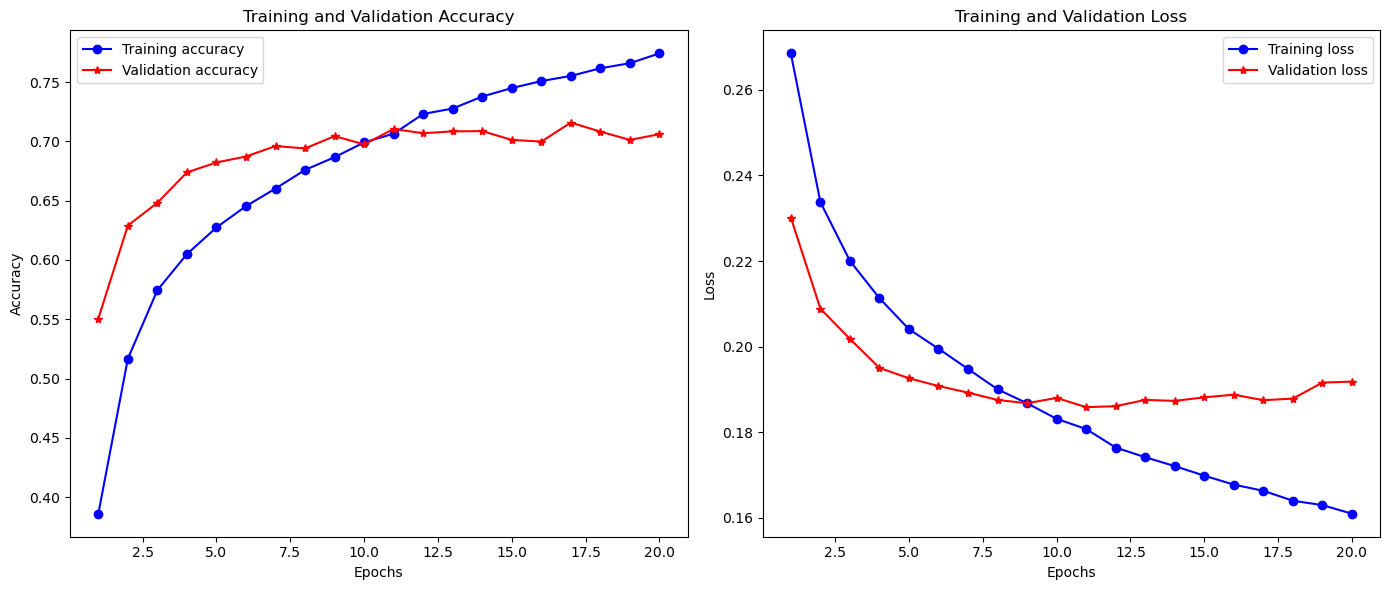

In [56]:
plot_history(history)

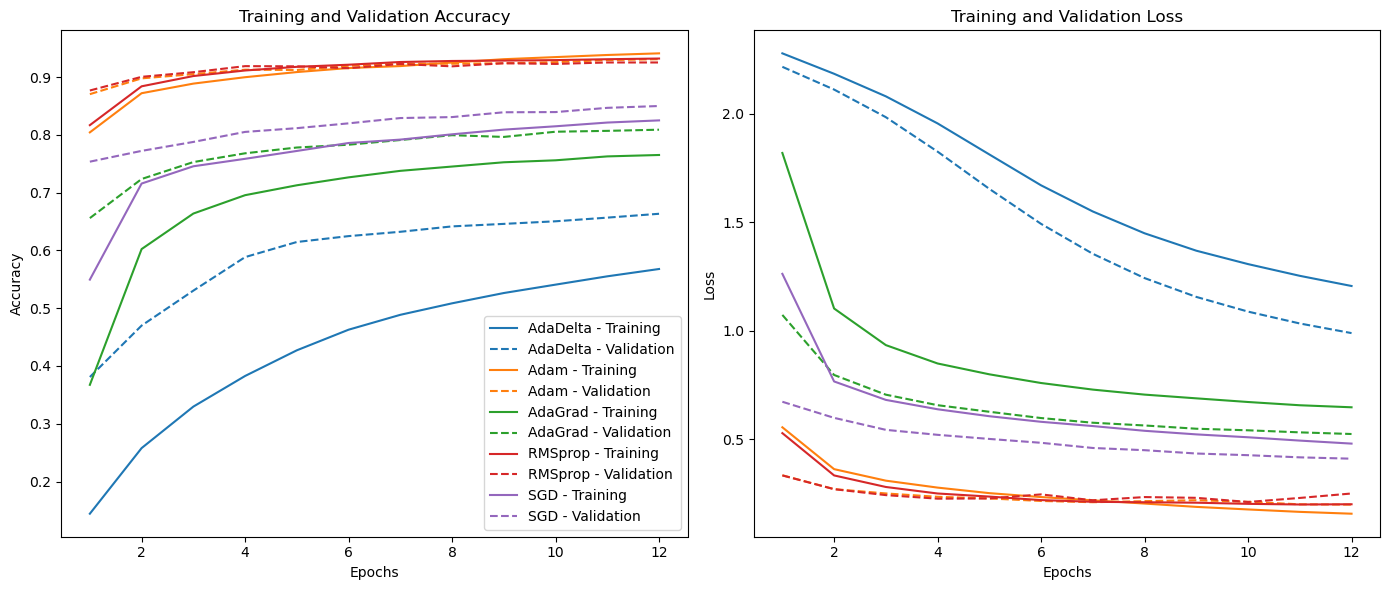

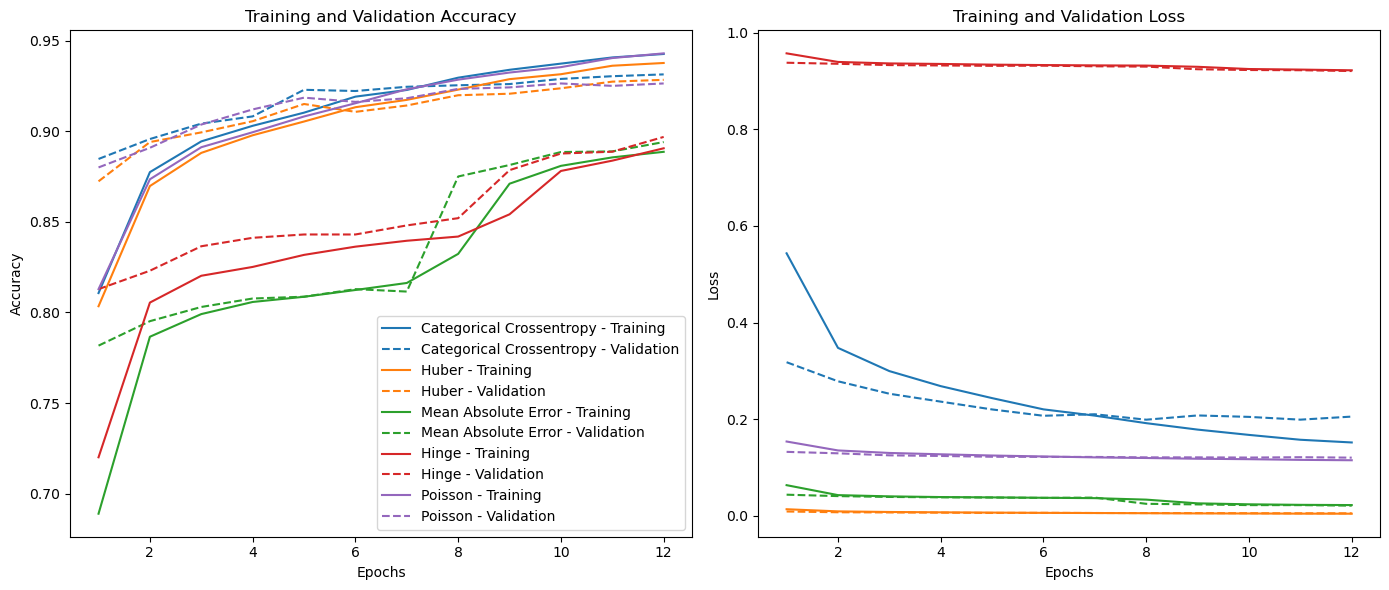

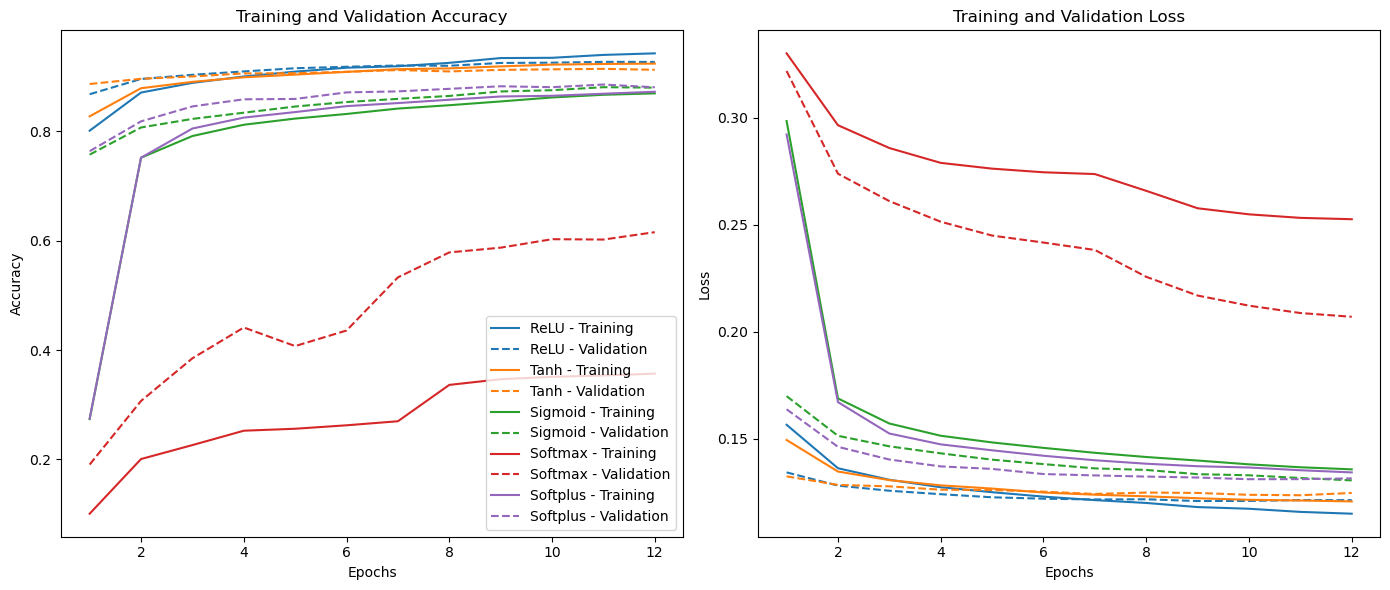

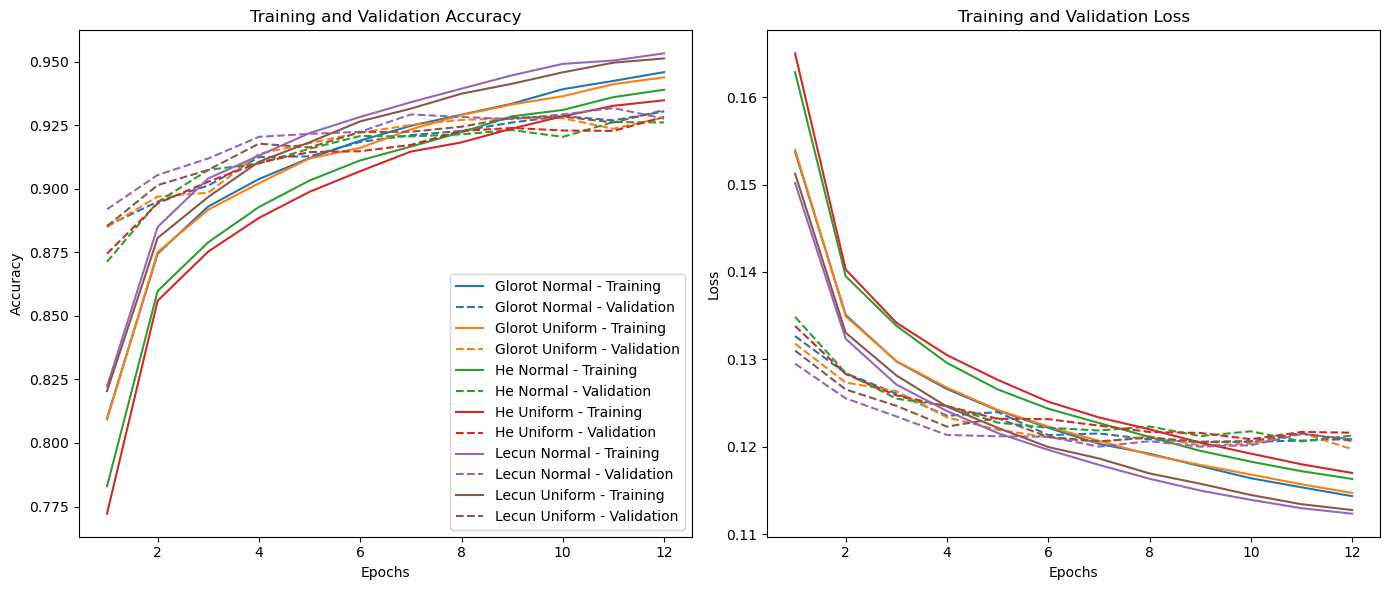

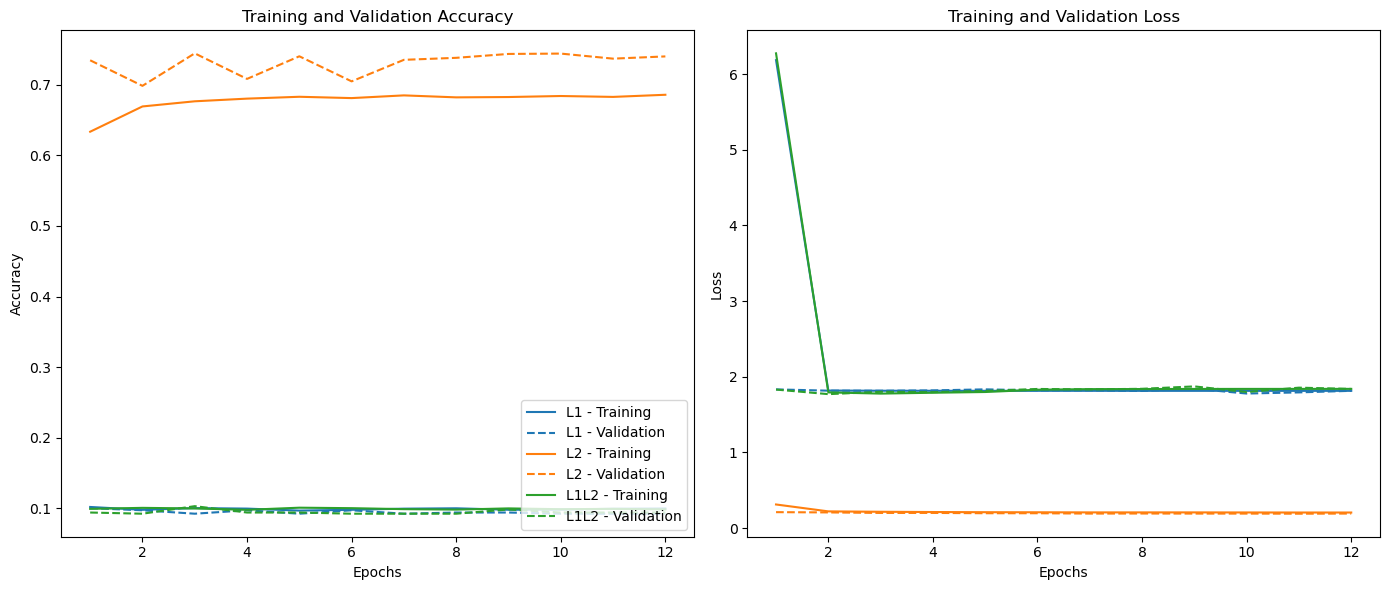

In [14]:
labels_opt = ['AdaDelta', 'Adam', 'AdaGrad', 'RMSprop', 'SGD']
labels_loss = ['Categorical Crossentropy', 'Huber', 'Mean Absolute Error', 'Hinge', 'Poisson']
labels_act = ['ReLU', 'Tanh', 'Sigmoid', 'Softmax', 'Softplus']
labels_init = ['Glorot Normal', 'Glorot Uniform', 'He Normal', 'He Uniform', 'Lecun Normal', 'Lecun Uniform']
labels_reg = ['L1', 'L2', 'L1L2', 'Orthogonal']

plot_multiple_histories(histories_opt, labels_opt, save_name='optimizers_cnn.pdf')
plot_multiple_histories(histories_loss, labels_loss, save_name='losses_cnn.pdf')
plot_multiple_histories(histories_act, labels_act, save_name='activations_cnn.pdf')
plot_multiple_histories(histories_init, labels_init, save_name='initializers_cnn.pdf')
plot_multiple_histories(histories_reg, labels_reg, save_name='regularizers_cnn.pdf')